<a href="https://colab.research.google.com/github/rittikarijhwani/ML-lab-sem7/blob/main/exp_3_simple_linear_regression_(kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ready, study from kaggle link

#https://www.kaggle.com/code/mvanshika/linear-regression-from-scratch/notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')

In [3]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [5]:
#converting to numpy arrays
X=X.values
y=y.values

In [6]:
#normalisation of data
u=X.mean()
std=X.std()
X=(X-u)/std

<ipython-input-7-5de469bbc3c9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


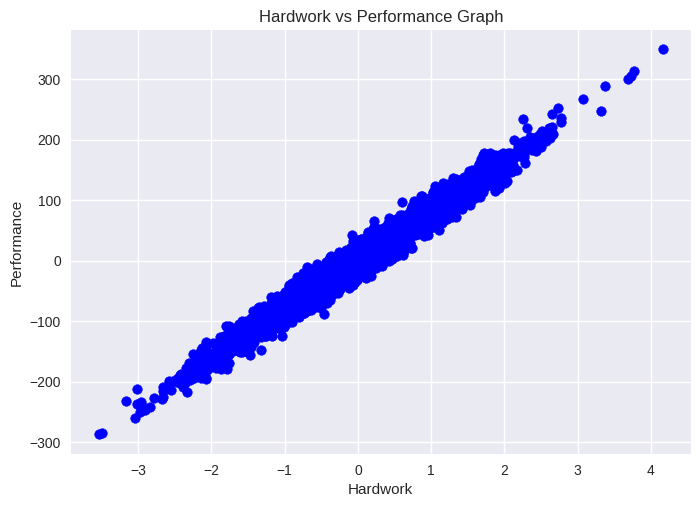

In [7]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='blue')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [8]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

In [9]:
def error(X,Y,theta):
    m = X.shape[0] #total no. of examples
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2

    return (total_error/m)

In [10]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

In [11]:
def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):

    theta = np.zeros((2,))
    error_list = []
    theta_list = []


    for i in range(max_steps):

        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]


        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)

    return theta,error_list,theta_list

In [12]:
theta,error_list,theta_list = gradientDescent(X,y)

<ipython-input-10-a8e8db8b6bcb>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (y_ - y)
<ipython-input-10-a8e8db8b6bcb>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += (y_ - y)*x


In [13]:
theta

array([ 0.6838508 , 79.90361453])

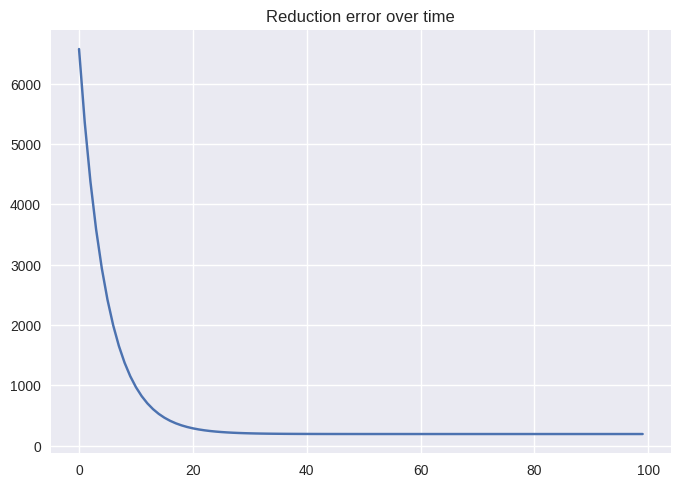

In [14]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [15]:
## Predictions and Best Line
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


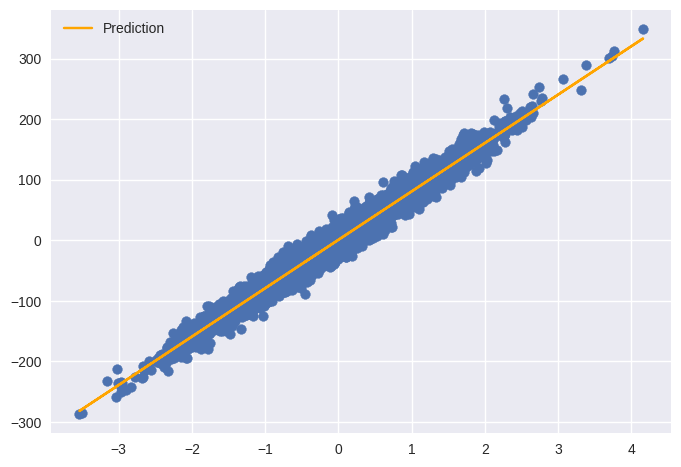

In [16]:
# Training + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [17]:
#coeff of determination
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [18]:
r2_score(y,y_)

97.09612226971643